In [3]:
import pandas as pd
import lightkurve as lk 
import matplotlib.pyplot as plt
import numpy as np

%run pipeline.ipynb

import warnings
warnings.filterwarnings("ignore")

In [4]:
pd.options.display.max_columns = None

In [5]:
dtypes={'pop_id':'Int64','TIC':'string','gaiadr3_source_id':'string','epic_id':'string'}

In [6]:
df=pd.read_csv('./makingtable/cleanedgaiadata.csv',dtype=dtypes)

In [7]:
ourtable=df[df.source_table=='our table']
nearbytable=df[df.source_table=='nearby table']

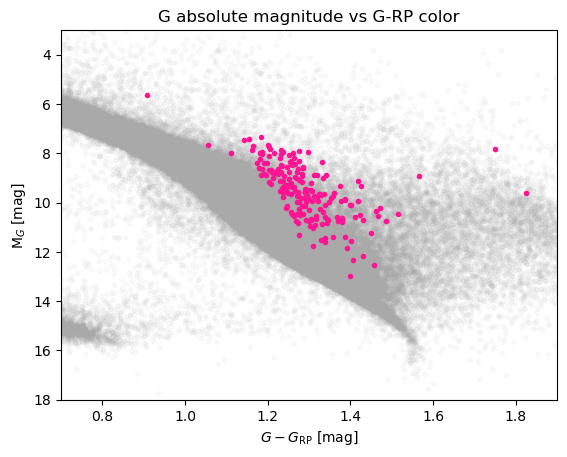

In [8]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_g_rp,ourtable.g_absmag,marker='.',color='deeppink')
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.show()

In [9]:
# coltypes={'ID':str,'TIC':str,'gaiadr3_source_id':str,'epic_id':str,'Score':'Int64','Flare':'Int64',
#           'Shelf':'Int64','Evolution':'Int64','Score.1':'Int64','Flare.1':'Int64','Shelf.1':'Int64','Evolution.1':'Int64'}

In [10]:
#lctable=pd.read_csv('lightcurvescores.csv',header=1,dtype=coltypes)

In [11]:
# lctable.rename(columns={'author_x':'LC_author','author_y':'paper_author','Score':'Score1','Flare':'Flare1',
#                         'Shelf':'Shelf1','Evolution':'Evolution1','Notes':'Notes1','Score.1':'Score2',
#                         'Flare.1':'Flare2','Shelf.1':'Shelf2','Evolution.1':'Evolution2','Notes.1':'Notes2'},inplace=True)

In [12]:
#lctable.drop(['calc_per','complex_status'],axis=1,inplace=True)

In [13]:
# lctable1=lctable[['pop_id','lcname','idtype','ID','secorcamp','LC_author','cadence','fluxamplitude',
#                  'TIC','gaiadr3_source_id','epic_id','per','group','age_Myr','disco_paper',
#                  'paper_author','year','Score1','Flare1','Shelf1','Evolution1','Notes1']]
# lctable2=lctable[['pop_id','lcname','idtype','ID','secorcamp','LC_author','cadence','fluxamplitude',
#                  'TIC','gaiadr3_source_id','epic_id','per2','group','age_Myr','disco_paper',
#                  'paper_author','year','Score2','Flare2','Shelf2','Evolution2','Notes2']]
# lctable1['per_col']='one'
# lctable2['per_col']='two'
# lctable1.dropna(subset=['Score1'],inplace=True)
# lctable2.dropna(subset=['Score2'],inplace=True)
# lctable1.rename(columns={'Score1':'Score','Flare1':'Flare','Shelf1':'Shelf',
#                          'Evolution1':'Evolution','Notes1':'Notes'},inplace=True)
# lctable2.rename(columns={'per2':'per','Score2':'Score','Flare2':'Flare','Shelf2':'Shelf',
#                          'Evolution2':'Evolution','Notes2':'Notes'},inplace=True)
# lctablecomb=pd.concat([lctable1,lctable2],ignore_index=True)

In [14]:
#lctablecomb[lctablecomb.pop_id==1]

In [15]:
#lctablecombfilt=lctablecomb[lctablecomb.Score!=9]

In [16]:
#lctablecombfilt[lctablecombfilt.pop_id==1]

In [17]:
#lctablecombfilt.to_csv('lcscoresreformat.csv',index=False)

In [18]:
coltypes={'ID':str,'TIC':str,'gaiadr3_source_id':str,'epic_id':str,'Score':'Int64','Flare':'Int64',
          'Shelf':'Int64','Evolution':'Int64'}

In [19]:
lctable=pd.read_csv('lcscoresreformat.csv',dtype=coltypes)

In [20]:
lctable[lctable.pop_id=='1']

,pop_id,lcname,idtype,ID,secorcamp,LC_author,cadence,fluxamplitude,TIC,gaiadr3_source_id,epic_id,per,group,age_Myr,disco_paper,paper_author,year,Score,Flare,Shelf,Evolution,Notes,per_col


In [21]:
def scorestr(scoreseries):
    scorearray=scoreseries.to_numpy()
    scorestr=''
    for score in scorearray:
        scorestr+=str(score)+' '
    return scorestr

In [22]:
def iscomplex(scoreseries):
    scores=scoreseries.to_numpy()
    return np.any(np.isin(scores, [1,2]))

In [23]:
def hasflare(flareseries):
    flares=flareseries.to_numpy()
    if np.any(np.isin(flares, [2])):
        return 'big flare'
    if np.any(np.isin(flares, [1])):
        return 'regular flare'
    return 'no flare'

In [24]:
def hasshelf(shelfseries):
    shelves=shelfseries.to_numpy()
    return np.any(np.isin(shelves, [1]))

In [25]:
# grouped=lctable.groupby(['pop_id']).agg(scoreagg=('Score',iscomplex),
#                                                   scorelist=('Score',scorestr)).reset_index()

In [26]:
grouped=lctable.groupby(['pop_id']).agg(iscomplex=('Score',iscomplex),
                                       flareagg=('Flare',hasflare),
                                       hasshelf=('Shelf',hasshelf),
                                       hasevolution=('Evolution',hasshelf)).reset_index()

In [27]:
grouped.head(10)

,pop_id,iscomplex,flareagg,hasshelf,hasevolution
0,0,1,big flare,1,1
1,1,1,regular flare,0,1
2,2,1,no flare,0,1
3,3,1,regular flare,0,0
4,4,1,regular flare,0,0
5,5,1,no flare,0,0
6,6,1,no flare,0,0
7,7,1,no flare,0,1
8,8,1,no flare,1,1
9,9,1,no flare,0,0


In [56]:
merged=pd.merge(grouped, df, on="pop_id", how="outer")